# Heart Disease UCI

In [16]:
import numpy as np
import pandas as pd
import pandas_profiling

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load the data set:

#### Data Description

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [3]:
df = pd.read_csv("heart.csv");
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [164]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [185]:
df.isnull().describe()
# There are no null values ! Yay!

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,303,303,303,303,303,303,303,303,303,303,303,303,303,303


## Data Profiling

In [19]:
profile = pandas_profiling.ProfileReport(df)
profile

## Exploratory Data Analysis

Text(0, 0.5, 'Count')

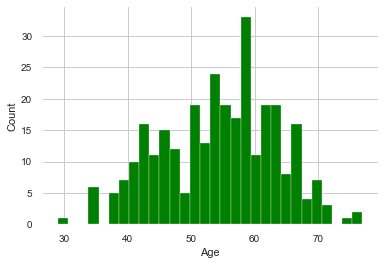

In [45]:
df['age'].hist(bins=30, color="green")
plt.xlabel("Age")
plt.ylabel("Count")

### We can see that most of the ages are above the age of 50 which makes sense as individuals are susceptible to heart disease at later stages of their life.

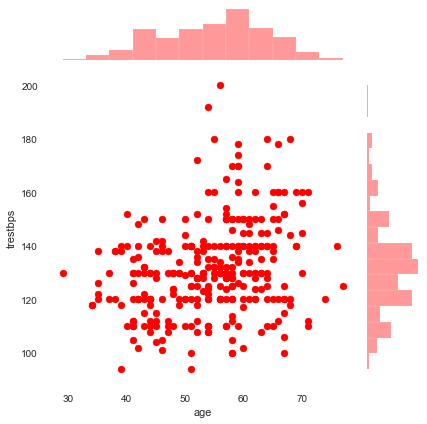

In [64]:
sns.jointplot("age", "trestbps", data=df, color="red")

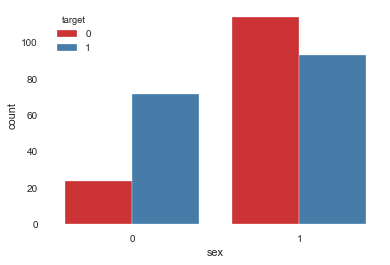

In [59]:
sns.countplot(x="sex", data=df, hue="target", palette="Set1")
# Where sex=1 (male) and sex=0 (female):

### We see that a greater proportion of women were susceptible to heart disease, could this be as a result of an input feature common amongst women and heavily correlated with target? Let's examine the correlations !

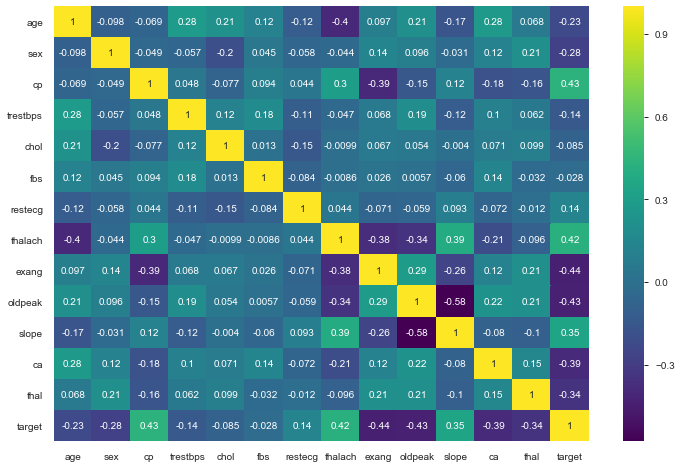

In [121]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), annot=True, cmap="viridis")

### We can see a strong negative correlation of target and [exang, oldpeak, ca,  final].
### A strong positive correlation of target and [cp, finalach, slope] is also apparent.
### Lets explore these further,

In [89]:
# First we examine the negative correlations to target:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

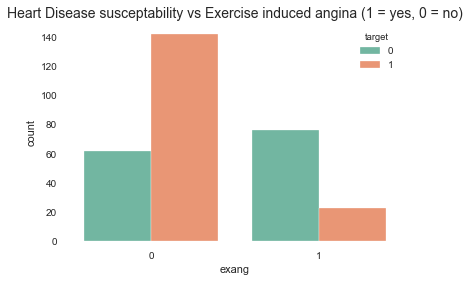

In [122]:
sns.countplot(x="exang",data=df, hue="target", palette="Set2")
plt.title("Heart Disease susceptability vs Exercise induced angina (1 = yes, 0 = no)", fontsize=14)
plt.show()

Text(0.5, 1.0, 'oldpeak vs target')

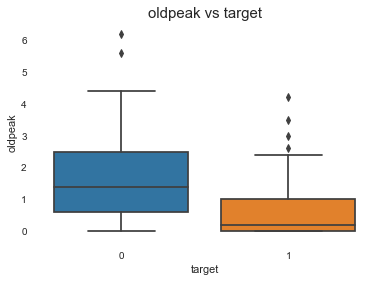

In [123]:
sns.boxplot(x="target", y="oldpeak", data=df)
plt.title("oldpeak vs target", fontsize=15)

### We notice that alot of the patients which did end up with disease have a relatively low oldpeak reading. 
### Now observe the relationship between number of major vessels and whether it was related to having heart disease

In [124]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

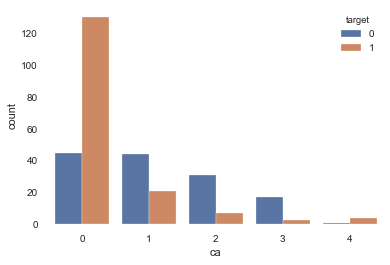

In [135]:
sns.countplot(x="ca", data=df, hue="target", palette="deep")

### As we would expect, the lower number of blood vessels a patient has the more likely they are to have heart disease.
### Now, lets see how age is linearly related to cholesterol which causes heart disease.

Text(0.5, 1, 'Cholesterol vs Age')

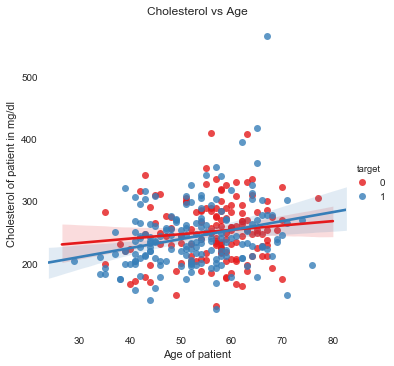

In [143]:
sns.lmplot(x="age", y="chol", data=df, hue="target", palette="Set1")
plt.xlabel("Age of patient")
plt.ylabel("Cholesterol of patient in mg/dl")
plt.title("Cholesterol vs Age")

### As we can expect from a quick google search, patients with heart disease have a greater growth rate of cholesterol levels as they age.

# Logistic Regression Classifier

### Split the data into training and testing sets (not currently using a cross-validation set for tuning any regularization hyperparameters)

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X = df.drop(columns=["target"])
y = df["target"]

In [204]:
# random_state = 24 (R.I.P Kobe Bryant):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

### Train and fit our Logistic Regression model

In [205]:
from sklearn.linear_model import LogisticRegression

In [206]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
predictions = lm.predict(X_test)

### Import relevent evaluation metrics to assess our model

In [208]:
from sklearn.metrics import classification_report, confusion_matrix

In [212]:
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        42
           1       0.84      0.94      0.88        49

    accuracy                           0.87        91
   macro avg       0.88      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



#### Now let's have a look at our confusion matrix

<Figure size 576x576 with 0 Axes>

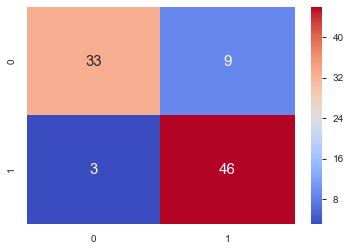

<Figure size 576x576 with 0 Axes>

In [228]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, annot_kws ={"size": 15}, cmap="coolwarm")
plt.figure(figsize=(8,8))

#### View weights of the coefficients for our parameters

In [222]:
print(lm.coef_)

[[ 0.00499429 -1.09880575  0.66006546 -0.00904828 -0.00323417  0.04591389
   0.36979262  0.03374624 -0.7392361  -0.53230875  0.44355862 -0.42517918
  -1.17774556]]


### Import ML debugging libraries

In [235]:
import eli5
from eli5.sklearn import PermutationImportance

### Let's see the weights of our features

In [234]:
# random_state = 8 once again for Kobe Bryant #RIP
perm = PermutationImportance(lm, random_state=8).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0703 ± 0.0453,thal
0.0637 ± 0.0596,thalach
0.0571 ± 0.0323,ca
0.0505 ± 0.0566,cp
0.0462 ± 0.0469,sex
0.0242 ± 0.0292,oldpeak
0.0132 ± 0.0164,exang
0.0132 ± 0.0164,trestbps
0.0110 ± 0.0311,restecg
0.0066 ± 0.0108,age


<Figure size 720x864 with 0 Axes>